In [1]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 가장 먼 노드

- 프로그래머스 **그래프** 문제
- 링크: https://programmers.co.kr/learn/courses/30/lessons/49189
- C++, Java, 큐를 연결 리스트로 구현 (Python에서는 그냥 deque 사용)

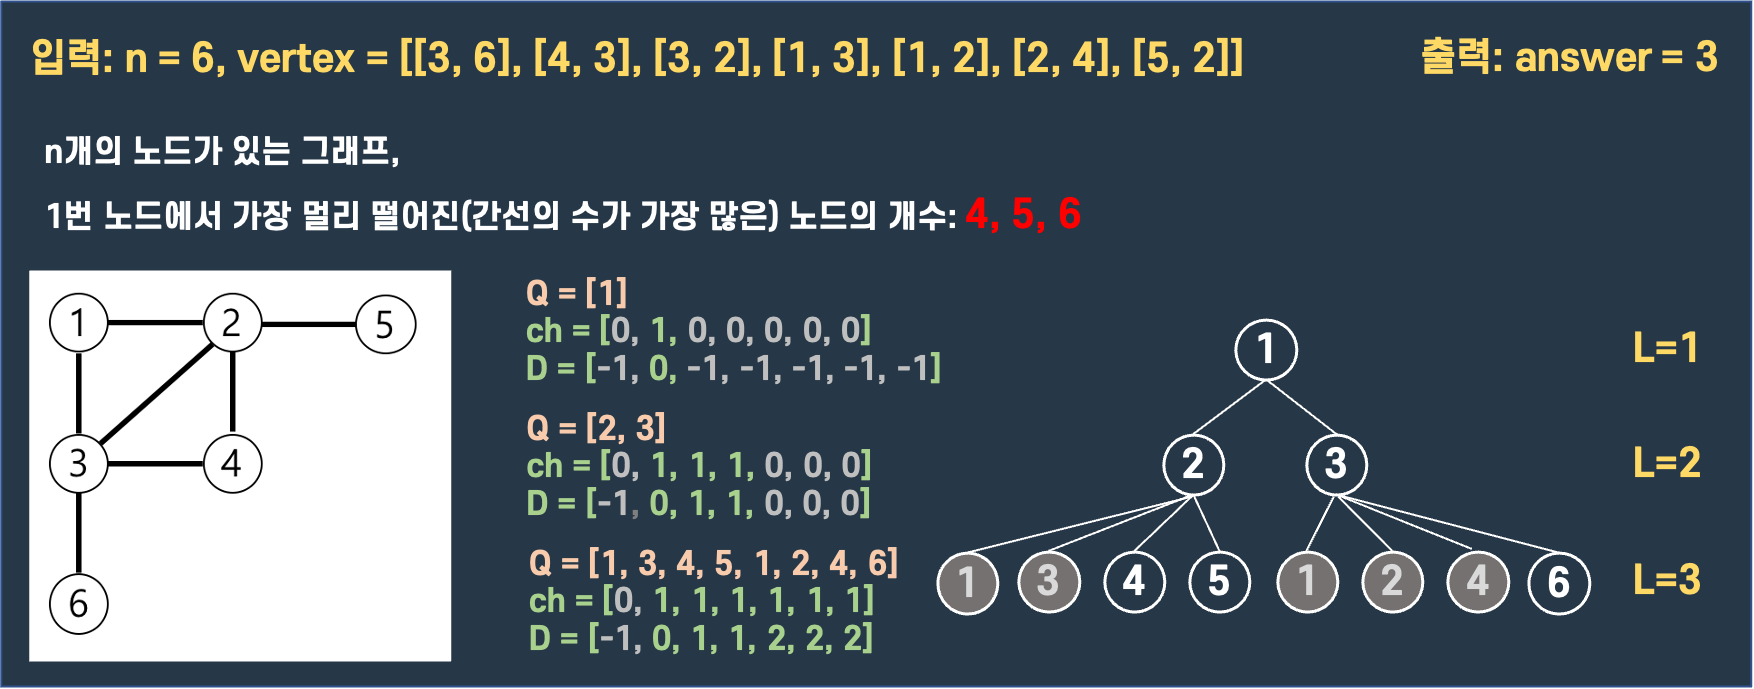

In [7]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/7-summary.png", height=400)

### 문제 설명

- BFS와 큐를 이용
- Q로 큐 구현, 현재 Level에서 갈 수 있는 노드(vertex)를 모두 넣음
- ch 체크리스트로 해당 노드에 이미 한 번 이상 방문했는지, 했으면 1로 설정하고 1인 ch[vertex]가 1인 노드는 더 이상 방문하지 않음
- D에는 1과 해당 노드까지의 거리를 대입

<br>
<br>
<br>





# 문제풀이 1
<br>

* 연결 상태 그래프를 나타내는 방법으로 리스트 이용

In [10]:
n = 6; edge = [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]

In [11]:
G = [[0]*(n+1) for _ in range(n+1)] # graph (n+1)*(n+1)

for [s,e] in edge: # graph 채우기, 연결되면 대칭으로 1 (무방향 그래프)
    G[s][e] = 1
    G[e][s] = 1

print(*G, sep='\n') # 인덱스 = 노드 번호로 맞추기 위해 첫 행과 첫 열 사용 X

[0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 1, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 0]
[0, 1, 1, 0, 1, 0, 1]
[0, 0, 1, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0]


In [12]:
from collections import deque

def solution(n, edge):
    answer = 0
    
    G = [[0]*(n+1) for _ in range(n+1)] # graph (n+1)*(n+1)
    
    for [s,e] in edge: # graph 채우기
        G[s][e] = 1
        G[e][s] = 1
    
    ch = [0]*(n+1) # Check List
    D = [-1]*(n+1) # Distance
    
    ch[1] = 1 # 초기값
    D[1] = 0 # 초기값
    
    Q = deque()
    Q.append(1)
    
    while Q:
        now = Q.popleft()
        
        for v in range(1,n+1):
            if G[now][v] == 1: # 현재 노드에서 갈 수 있는 노드(vertex)일 때
                if ch[v] == 0: # 한번도 방문하지 않은 노드라면
                    Q.append(v) # 큐에 추가
                    ch[v] = 1 # 체크리스트에 1로 표시
                    D[v] = D[now] + 1 # 현재 노드와 1까지의 거리 + 1 = 다음 노드와 1까지의 거리

    answer = D.count(max(D)) # max와 같은 개수를 세서 반환
    
    return answer

In [14]:
n = 6; edge = [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]]
solution(n, edge)

3

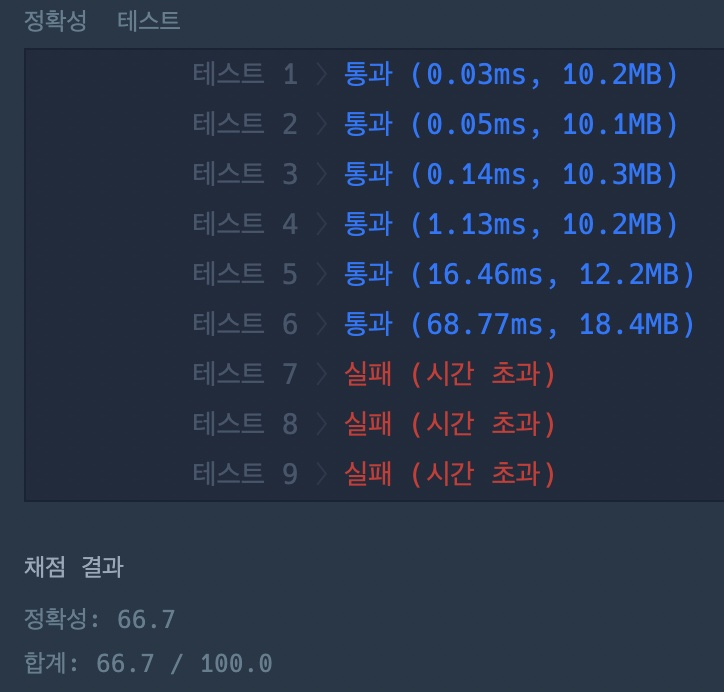

In [27]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/7-failure.jpg", height=350)

<br>
<br>
<br>





# 문제풀이 2
<br>

* 연결 상태 그래프를 나타내는 방법으로 딕셔너리 이용
* if문 하나를 줄일 수 있음, for문을 돌 때 연결된 노드 개수만큼만 돌 수 있음

In [18]:
G = {} # graph (n+1)*(n+1)

for [s,e] in edge: # graph 채우기
    G.setdefault(s, []).append(e)
    G.setdefault(e, []).append(s)

In [19]:
G

{1: [3, 2], 2: [3, 1, 4, 5], 3: [6, 4, 2, 1], 4: [3, 2], 5: [2], 6: [3]}

In [17]:
from collections import deque

def solution(n, edge):
    answer = 0
    
    G = {} # graph (n+1)*(n+1)
    
    for [s,e] in edge: # graph 채우기
        G.setdefault(s, []).append(e)
        G.setdefault(e, []).append(s)
    
    ch = [0]*(n+1) # Check List
    D = [-1]*(n+1) # Distance
    
    ch[1] = 1 # 초기값
    D[1] = 0 # 초기값
    
    Q = deque()
    Q.append(1)
    
    while Q:
        now = Q.popleft()
        
        for v in G[now]:
            if ch[v] == 0: 한번도 방문하지 않은 노드라면,
                Q.append(v) # 큐에 추가
                ch[v] = 1 # 체크리스트에 1로 표시
                D[v] = D[now] + 1 # 현재 노드와 1까지의 거리 + 1 = 다음 노드와 1까지의 거리
    
    answer = D.count(max(D))
    
    return answer

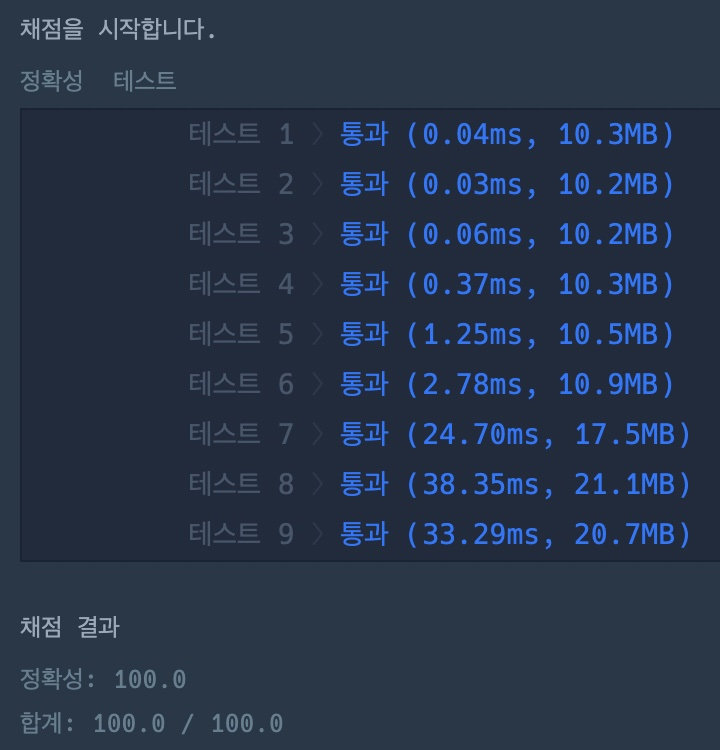

In [28]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/7-success.jpg", height=350)